<a href="https://colab.research.google.com/github/nurindahpuspa16/ANN-with-Time-Series/blob/main/Submission_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from keras.layers import Dense, LSTM
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1262 non-null   object 
 1   Open       1262 non-null   float64
 2   High       1262 non-null   float64
 3   Low        1262 non-null   float64
 4   Close      1262 non-null   float64
 5   Adj Close  1262 non-null   float64
 6   Volume     1262 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.1+ KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

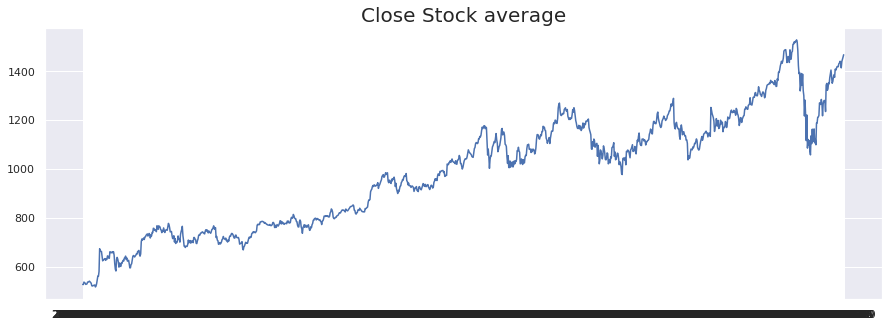

In [ ]:
dates = df['Date'].values
temp  = df['Close'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Close Stock average',
          fontsize=20);

In [ ]:
len_train = len(temp)*0.8
len_train = int(len_train)
temp_train = temp[:len_train]


In [ ]:
len_val = len(temp)*0.2
len_val = int(len_val)
temp_val = temp[len_val:]

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
temp_train = temp_train.reshape(-1, 1)
training_set_scaled = sc.fit_transform(temp_train)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
temp_val = temp_val.reshape(-1, 1)
val_set_scaled = sc.fit_transform(temp_val)

X_test = []
y_test = []
for i in range(60, 800):
    X_test.append(training_set_scaled[i-60:i, 0])
    y_test.append(training_set_scaled[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(X_train, y_train, epochs = 130, batch_size = 32, callbacks=[lr_schedule],
                    validation_data=(X_test, y_test))

Epoch 1/130
24/24 [==============================] - 2s 103ms/step - loss: 0.1190 - mae: 0.4453 - val_loss: 0.1190 - val_mae: 0.4453
Epoch 2/130
24/24 [==============================] - 2s 75ms/step - loss: 0.1190 - mae: 0.4453 - val_loss: 0.1190 - val_mae: 0.4453
Epoch 3/130
24/24 [==============================] - 2s 75ms/step - loss: 0.1190 - mae: 0.4453 - val_loss: 0.1190 - val_mae: 0.4453
Epoch 4/130
24/24 [==============================] - 2s 75ms/step - loss: 0.1190 - mae: 0.4453 - val_loss: 0.1190 - val_mae: 0.4452
Epoch 5/130
24/24 [==============================] - 2s 76ms/step - loss: 0.1190 - mae: 0.4452 - val_loss: 0.1190 - val_mae: 0.4452
Epoch 6/130
24/24 [==============================] - 2s 76ms/step - loss: 0.1190 - mae: 0.4452 - val_loss: 0.1190 - val_mae: 0.4452
Epoch 7/130
24/24 [==============================] - 2s 78ms/step - loss: 0.1190 - mae: 0.4452 - val_loss: 0.1190 - val_mae: 0.4452
Epoch 8/130
24/24 [==============================] - 2s 77ms/step - loss: 0